# DS Bootcamp - U2L1.8 - Challenge - Preparing a dataset for modeling
### ToDo:
Now it's time to play with some data. You're going to work through the stages of model preparation we've covered in this lesson and write up each one. Keep a good record in a Jupyter notebook – we'll come back to your features in a future model-building assignment on Least Squares Regression.

Using a dataset of your choice, select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features. Explore the variables using the univariate and bivariate methods you've learned so far.

Next, based on what you learned via your data exploration, create ten new features. Explain the reasoning behind each one.

Finally, use filtering methods to select the five best features and justify your choices.

### 2. Exploring the data

> <u>Exploring the data: Univariate</u>

After defining the research question, your next step toward building a model is to get to know the individual variables through inspection of the data file itself, visualizations and univariate descriptive statistics ("univariate" means pertaining to one variable, rather than many). You’ll want to answer questions such as:

- How many variables do I have?
- How many datapoints?
- Which variables are continuous (having an infinite number of possible values, such as age) and which are categorical (having a limited number of values, such as gender).
- Do any of my variables have a known probability distribution (normal, Poisson, Gamma, etc)?
- Do I have missing data? If so, how much?
- How much variance is there in each of my variables? If you’ve cleaned this dataset yourself, you’ll probably already know the answers to most of these questions.

> <u>Exploring the data: Bivariate</u>

Next, examine the pairwise relationships among your data ("bivariate", of course, meaning pertaining to two variables).

2.1. <b>For two continuous variables:</b>
- The scatterplot
- The correlation coefficient '<b>r</b>' [-1;1]
- Look for: two-dimensional outliers that represent unusual combinations of values

2.2. <b>For a continuous and a categorical pair:</b>
- Box, violin, or similar plots
- Descriptive statistics, including estimates of central tendency and variance, for the continuous variable at each level of the categorical variable.
- T-tests and ANOVA
- Look for: Outliers in each group, very small groups

2.3. <b>For two categorical variables:</b>
- A barplot, with the height of each bar indicating the number of datapoints in each combination of levels of the two variables
- A table of counts, giving the number of datapoints for each combination of levels of the two variables
- Chi-square tests that indicate whether one combination of levels is significantly smaller or larger than the rest.
- Look for: Subgroups with very small counts relative to the other subgroups

#### Starting to focus in
At this point, you should decide on a strategy for dealing with unusual two-dimensional datapoints. This could include discarding the data, winsorizing, or collapsing very small or very similar subgroups into one larger category. Then it's time to move on to feature engineering.

### Feature selection

We want to keep the features that have the strongest connection to the outcome, while also prioritizing features that bring something unique to the table. 

The one thing all feature selection algorithms have in common is that they work better when data is separated into a training set and a test set, and feature selection is run on the training set.

Feature selection algorithms fall into three broad groups:

* Filter methods
* Wrapper methods
* Embedded methods

<b>Filter methods</b> evaluate each feature separately and assign it a "score" that is used to rank the features, with scores above a certain cutoff point being retained or discarded. The feature may be evaluated independently of the outcome, or in combination with it.

<b>Wrapper methods</b> select sets of features. Different sets are constructed, evaluated in terms of their predictive power in a model, and performance is compared to the performance of other sets. Wrapper methods differ in terms of how the sets of features are constructed. Two such feature construction methods are "forward passes"(=<i>with no features, than adds 1-by-1</i>) and "backward passes"(=<i>with all features, than drops 1-by-1</i>).

<b>Embedded methods</b> also select sets of features, but do so as an intrinsic part of the fitting method for the particular type of model you're using. This may involve <u>regularization</u>, where a "complexity penalty" is added to goodness-of-fit measures typically used to assess the predictive power of a model. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [52]:
# Make the scatterplot matrix
# Set the default plot aesthetics to be prettier.
sns.set_style("white")

df = pd.read_csv('speed-dating-experiment\Speed_Dating_Data.csv' ,encoding ='latin1')


In [4]:
df.head(5)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [53]:
df['from'].value_counts().head(15) # 

New York         522
New Jersey       365
California       301
China            139
Italy            132
New York City    130
Boston           123
Texas            120
NYC              109
India            107
Maryland         106
Israel           104
Taiwan           103
Chicago           95
Spain             87
Name: from, dtype: int64

In [62]:
'''iid: 	unique subject number, group(wave id gender)
id:  	subject number within wave
gender:	Female=0;Male=1
round:		number of people that met in wave
partner: 	partner’s id number the night of event
match		1=yes, 0=no
pid: 		partner’s iid number
from:Where are you from originally (before coming to Columbia
income:Median household income based on zipcode using the Census Bureau website
int_corr:	correlation between participant’s and partner’s ratings of interests in 			Time 1
samerace:  	participant and the partner were the same race. 1= yes, 0=no
age_o:		age of partner
race_o:		race of partner

race:
	Black/African American=1
	European/Caucasian-American=2
	Latino/Hispanic American=3
	Asian/Pacific Islander/Asian-American=4
	Native American=5
	Other=6

imprace:How important is it to you (on a scale of 1-10) that a person you date be of the same racial/ethnic background?

imprelig: How important is it to you (on a scale of 1-10) that a person you date be of the same religious background?
goal:
What is your primary goal in participating in this event? 
	Seemed like a fun night out=1
	To meet new people=2
	To get a date=3
	Looking for a serious relationship=4
	To say I did it=5
	Other=6

date:
In general, how frequently do you go on dates? 
	Several times a week=1
	Twice a week=2
	Once a week=3
	Twice a month=4
	Once a month=5
	Several times a year=6
	Almost never=7

go_out:
How often do you go out (not necessarily on dates)?
	Several times a week=1
	Twice a week=2
	Once a week=3
	Twice a month=4
	Once a month=5
	Several times a year=6
	Almost never=7
    
exphappy:Overall, on a scale of 1-10, how happy do you expect to be with the people you meet during the speed-dating event?
'''

df_slim = df.loc[ ((df['from']=='California') | (df['from']=='New York')) #'New Jersey','Boston','Texas','China'
                 #'iid','id',,'pid' ,['age','gender','wave','round','partner','match','int_corr' ,'samerace','age_o','race_o' ,
                   ,['from','income', 'race','imprace','imprelig','goal','date','go_out','exphappy'  ]]
df_slim.head()

,from,income,race,imprace,imprelig,goal,date,go_out,exphappy
170,New York,"52,010.00",2.0,8.0,8.0,1.0,6.0,1.0,5.0
171,New York,"52,010.00",2.0,8.0,8.0,1.0,6.0,1.0,5.0
172,New York,"52,010.00",2.0,8.0,8.0,1.0,6.0,1.0,5.0
173,New York,"52,010.00",2.0,8.0,8.0,1.0,6.0,1.0,5.0
174,New York,"52,010.00",2.0,8.0,8.0,1.0,6.0,1.0,5.0


In [56]:
df_slim['from'].value_counts().head(15)

New York      522
California    301
Name: from, dtype: int64

In [58]:
df_slim['race'].value_counts().head(15)

2.0    458
4.0    206
1.0     65
6.0     50
3.0     44
Name: race, dtype: int64

In [63]:
df_slim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 823 entries, 170 to 7937
Data columns (total 9 columns):
from        823 non-null object
income      716 non-null object
race        823 non-null float64
imprace     823 non-null float64
imprelig    823 non-null float64
goal        823 non-null float64
date        823 non-null float64
go_out      823 non-null float64
exphappy    823 non-null float64
dtypes: float64(7), object(2)
memory usage: 64.3+ KB


In [113]:
# df_slim.dropna()

In [64]:
df_slim[df_slim.isnull().any(axis=1)]

,from,income,race,imprace,imprelig,goal,date,go_out,exphappy
1676,New York,NaN,1.0,2.0,4.0,2.0,7.0,4.0,6.0
1677,New York,NaN,1.0,2.0,4.0,2.0,7.0,4.0,6.0
1678,New York,NaN,1.0,2.0,4.0,2.0,7.0,4.0,6.0
1679,New York,NaN,1.0,2.0,4.0,2.0,7.0,4.0,6.0
1680,New York,NaN,1.0,2.0,4.0,2.0,7.0,4.0,6.0
1681,New York,NaN,1.0,2.0,4.0,2.0,7.0,4.0,6.0
1682,New York,NaN,1.0,2.0,4.0,2.0,7.0,4.0,6.0
1683,New York,NaN,1.0,2.0,4.0,2.0,7.0,4.0,6.0
1684,New York,NaN,1.0,2.0,4.0,2.0,7.0,4.0,6.0
1685,New York,NaN,1.0,2.0,4.0,2.0,7.0,4.0,6.0


In [65]:
#Replace string chars from 'income' column:
df_slim['income']=df_slim['income'].str.replace('.00','').str.replace(',','')

In [66]:
#Convert values from 'income' to numeric:
df_slim['income']=pd.to_numeric(df_slim['income'])

In [67]:
df_slim.loc[df_slim['from']=='California','income'].median()

43664.0

In [68]:
#Replace Nan values from column 'income' with the median for the two cities:
df_slim.loc[df_slim['from']=='California','income'] = df_slim.loc[df_slim['from']=='California','income'].fillna(df_slim[df_slim['from']=='California']['income'].median())
df_slim.loc[df_slim['from']=='New York','income'] = df_slim.loc[df_slim['from']=='New York','income'].fillna(df_slim[df_slim['from']=='New York']['income'].median())


In [69]:
df_slim['income'].value_counts().head(15)

43664.0    74
49642.0    71
46272.0    22
32508.0    22
32386.0    22
73073.0    21
25401.0    21
50060.0    21
53229.0    21
55704.0    20
32649.0    20
30855.0    20
30146.0    20
65708.0    20
56118.0    20
Name: income, dtype: int64

In [70]:
df_slim.describe()

,income,race,imprace,imprelig,goal,date,go_out,exphappy
count,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000
mean,46001.313487,2.718104,4.753341,4.312272,2.343864,4.765492,2.036452,5.035237
std,15092.002644,1.261733,3.210182,2.953563,1.438811,1.338981,0.895315,2.024178
min,8607.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000
25%,32649.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,3.000000
50%,43664.000000,2.000000,5.000000,3.000000,2.000000,4.000000,2.000000,5.000000
75%,55419.000000,4.000000,8.000000,7.000000,3.000000,6.000000,3.000000,7.000000
max,87789.000000,6.000000,10.000000,10.000000,6.000000,7.000000,5.000000,8.000000


### 2.1. For two continuous variables:

- The scatterplot
- The correlation coefficient 'r' [-1;1]
- Look for: two-dimensional outliers that represent unusual combinations of values


In [108]:
# Make a copy of the data to add jitter to and plot.
#df_jittered = df_czch.loc[:, 'tvtot':'sclmeet'].dropna()
df_slim_jitter = df_slim.loc[:,['income','race','imprace','goal','go_out','exphappy']]

In [109]:
# Making the random noise.
jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size=(df_slim_jitter.shape)),
    columns=df_slim_jitter.columns
)
# Combine the data and the noise.
df_slim_jitter = df_slim_jitter.add(jitter)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


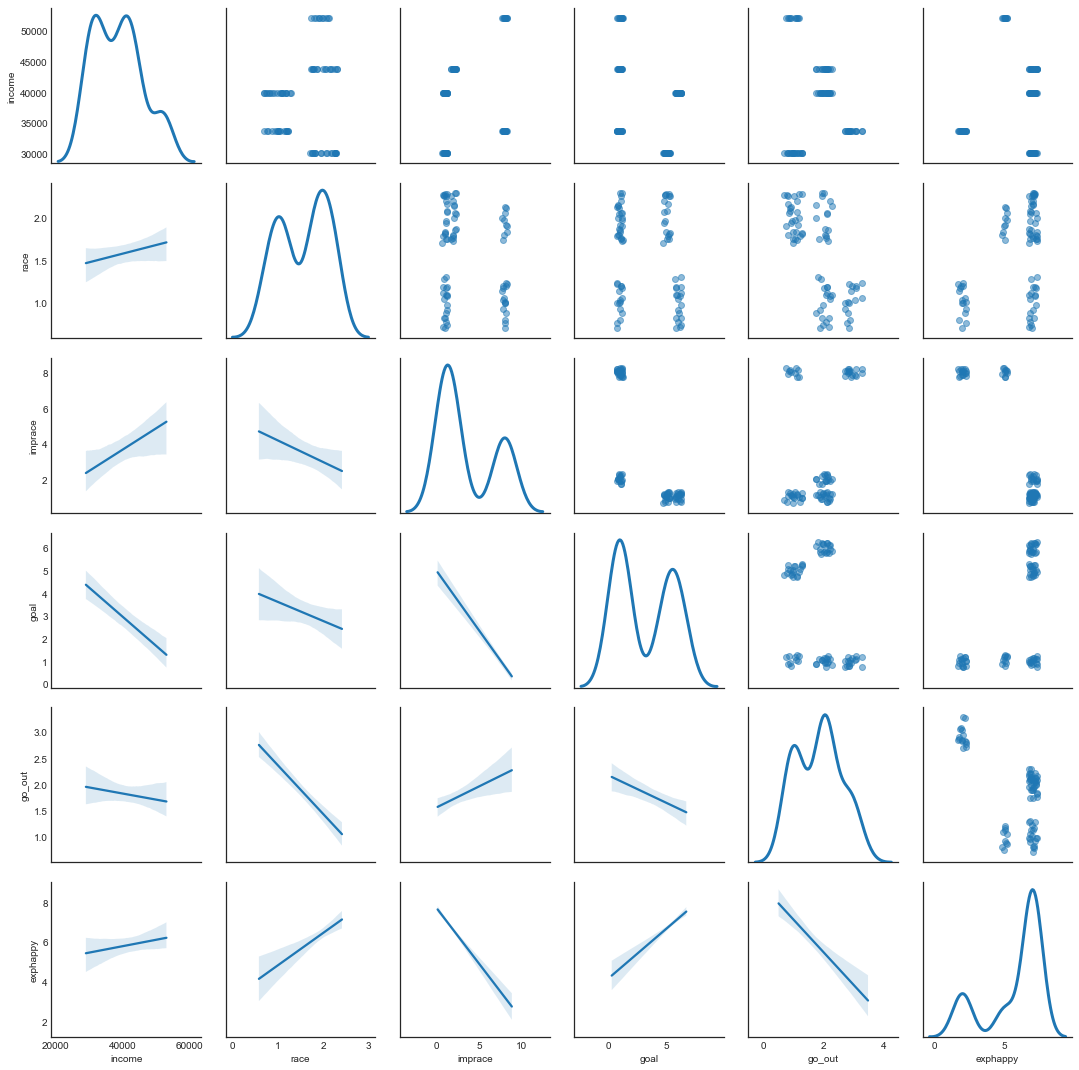

In [110]:

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df_slim_jitter.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()


In [111]:
# Make the correlation matrix.
df_slim_corr = df_slim.loc[:,['income','race','imprace','goal','go_out','exphappy']]
corrmat = df_slim_corr.corr()
print(corrmat)



            income      race   imprace      goal    go_out  exphappy
income    1.000000  0.002017 -0.087306 -0.052562 -0.109683  0.143481
race      0.002017  1.000000  0.009844 -0.321140  0.045723 -0.169968
imprace  -0.087306  0.009844  1.000000 -0.280032  0.029798 -0.020565
goal     -0.052562 -0.321140 -0.280032  1.000000 -0.187286  0.141616
go_out   -0.109683  0.045723  0.029798 -0.187286  1.000000 -0.388038
exphappy  0.143481 -0.169968 -0.020565  0.141616 -0.388038  1.000000


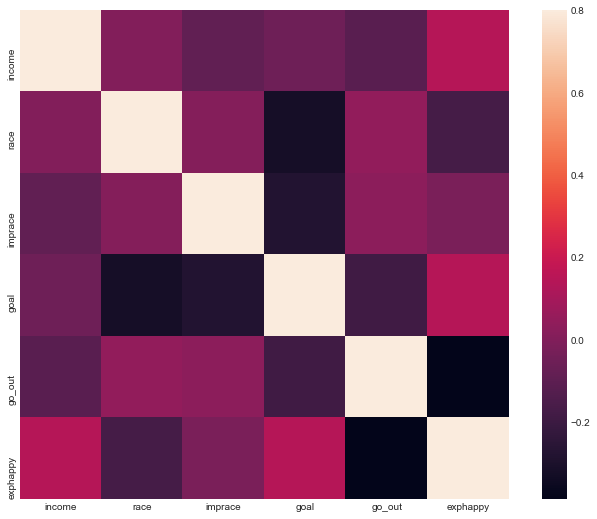

In [112]:
# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()
# Heatmaps are a great way to get a quick visual read on a big correlation matrix.

# Try to match the correlation numbers to the scatterplots above to get a 
# sense of what each magnitude of correlation can look like.

In [ ]:
'''iid: 	unique subject number, group(wave id gender)
id:  	subject number within wave
gender:	Female=0;Male=1
round:		number of people that met in wave
partner: 	partner’s id number the night of event
match		1=yes, 0=no
pid: 		partner’s iid number
from:Where are you from originally (before coming to Columbia
income:Median household income based on zipcode using the Census Bureau website
int_corr:	correlation between participant’s and partner’s ratings of interests in 			Time 1
samerace:  	participant and the partner were the same race. 1= yes, 0=no
age_o:		age of partner
race_o:		race of partner

race:
	Black/African American=1
	European/Caucasian-American=2
	Latino/Hispanic American=3
	Asian/Pacific Islander/Asian-American=4
	Native American=5
	Other=6

imprace:How important is it to you (on a scale of 1-10) that a person you date be of the same racial/ethnic background?

imprelig: How important is it to you (on a scale of 1-10) that a person you date be of the same religious background?
goal:
What is your primary goal in participating in this event? 
	Seemed like a fun night out=1
	To meet new people=2
	To get a date=3
	Looking for a serious relationship=4
	To say I did it=5
	Other=6

date:
In general, how frequently do you go on dates? 
	Several times a week=1
	Twice a week=2
	Once a week=3
	Twice a month=4
	Once a month=5
	Several times a year=6
	Almost never=7

go_out:
How often do you go out (not necessarily on dates)?
	Several times a week=1
	Twice a week=2
	Once a week=3
	Twice a month=4
	Once a month=5
	Several times a year=6
	Almost never=7
    
exphappy:Overall, on a scale of 1-10, how happy do you expect to be with the people you meet during the speed-dating event?
'''

### 2.2. For a continuous and a categorical pair:

    - Box, violin, or similar plots
    - Descriptive statistics, including estimates of central tendency and variance, for the continuous variable at each level of the categorical variable.
    - T-tests and ANOVA
    - Look for: Outliers in each group, very small groups


In [113]:
df_slim['from'].value_counts()

New York      522
California    301
Name: from, dtype: int64

In [114]:
# Plot all the variables with boxplots for each country.

# Restructure the data so we can use FacetGrid rather than making a boxplot
# for each variable separately.
# df.loc[:, df.columns != 'b']
df_long = df_slim.loc[:, df_slim.columns != 'income']
df_long = pd.melt(df_long, id_vars=['from'])

In [115]:
df_long

,from,variable,value
0,New York,race,2.0
1,New York,race,2.0
2,New York,race,2.0
3,New York,race,2.0
4,New York,race,2.0
5,New York,race,2.0
6,New York,race,2.0
7,New York,race,2.0
8,New York,race,2.0
9,New York,race,2.0


C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


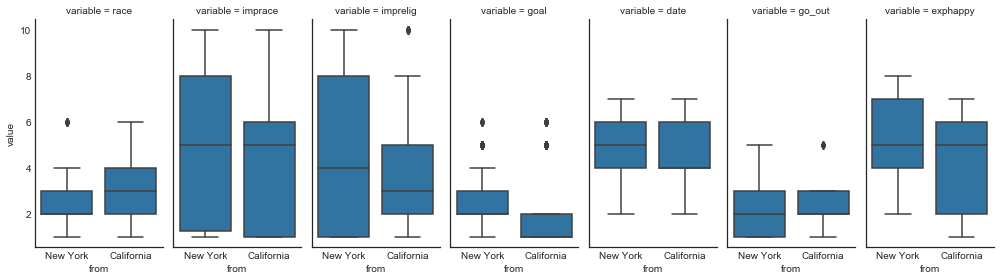

In [116]:
g = sns.FacetGrid(df_long, col="variable", size=4, aspect=.5)
g = g.map(sns.boxplot, "from", "value")
plt.show()

# Feature engineering

['New York' 'California']


In [127]:
df_slim2 = df.loc[ ((df['from']=='California') | (df['from']=='New York')| (df['from']=='China')| (df['from']=='Texas')| (df['from']=='Boston')| (df['from']=='New Jersey')) 
                 #'iid','id',,'pid' ,['age','gender','wave','round','partner','match','int_corr' ,'samerace','age_o','race_o' ,
                   ,['age','from','income', 'race','imprace','imprelig','goal','date','go_out','exphappy'  ]]
df_slim2.head()

,age,from,income,race,imprace,imprelig,goal,date,go_out,exphappy
30,23.0,Texas,"37,754.00",2.0,1.0,1.0,1.0,5.0,1.0,1.0
31,23.0,Texas,"37,754.00",2.0,1.0,1.0,1.0,5.0,1.0,1.0
32,23.0,Texas,"37,754.00",2.0,1.0,1.0,1.0,5.0,1.0,1.0
33,23.0,Texas,"37,754.00",2.0,1.0,1.0,1.0,5.0,1.0,1.0
34,23.0,Texas,"37,754.00",2.0,1.0,1.0,1.0,5.0,1.0,1.0


In [128]:
print(df_slim2['from'].unique())

['Texas' 'New York' 'New Jersey' 'California' 'Boston' 'China']


In [129]:
# Making dummies.
# Also creating a data frame to hold our features.
features = pd.get_dummies(df_slim2['from'])
features.head()

,Boston,California,China,New Jersey,New York,Texas
30,0,0,0,0,0,1
31,0,0,0,0,0,1
32,0,0,0,0,0,1
33,0,0,0,0,0,1
34,0,0,0,0,0,1


### Changing variable types

In [130]:
print(df_slim2['age'].unique())

[23. 27. 21. 30. 28. 22. 29. 25. 20. nan 19. 26. 36. 35. 24. 32. 34. 33.
 31.]


In [131]:
df_slim2['age'].value_counts()

23.0    222
28.0    201
26.0    195
27.0    194
24.0    176
25.0    169
22.0     88
30.0     73
29.0     66
32.0     39
21.0     30
36.0     22
20.0     20
33.0     18
31.0     18
19.0     10
35.0     10
34.0      9
Name: age, dtype: int64

In [132]:
features['Above30'] = np.where(df_slim2['age']>=30, 1, 0)

# Check to make sure it worked.
print(df_slim2['age'].groupby(features['Above30']).describe())

          count       mean       std   min   25%   50%   75%   max
Above30                                                           
0        1371.0  25.208607  2.255947  19.0  23.0  25.0  27.0  29.0
1         189.0  31.947090  2.069884  30.0  30.0  32.0  33.0  36.0


# PCA

In [134]:
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [152]:
# Take a subset of the data for PCA and drop missing values because PCA cannot
# handle them. We could also impute, but missingness is quite low so dropping
# missing rows is unlikely to create bias.
df_pca =  df.loc[ ((df['from']=='California') | (df['from']=='New York')) #'New Jersey','Boston','Texas','China'
                 #'iid','id',,'pid' ,['age','gender','wave','round','partner','match','int_corr' ,'samerace'
                   ,['from','age','age_o','race_o','income', 'race','imprace','imprelig','goal','date','go_out','exphappy'  ]].dropna()


In [153]:
#Replace string chars from 'income' column:
df_pca['income']=df_pca['income'].str.replace('.00','').str.replace(',','')
#Convert values from 'income' to numeric:
df_pca['income']=pd.to_numeric(df_pca['income'])
#Replace Nan values from column 'income' with the median for the two cities:
df_pca.loc[df_pca['from']=='California','income'] = df_pca.loc[df_pca['from']=='California','income'].fillna(df_pca[df_pca['from']=='California']['income'].median())
df_pca.loc[df_pca['from']=='New York','income'] = df_pca.loc[df_pca['from']=='New York','income'].fillna(df_pca[df_pca['from']=='New York']['income'].median())

#Remove this column after I processed it above:
df_pca=df_pca.loc[:, df_pca.columns != 'from']
# 11 columns!

In [154]:

# Normalize the data so that all variables have a mean of 0 and standard deviation
# of 1.
X = StandardScaler().fit_transform(df_pca)

# The NumPy covariance function assumes that variables are represented by rows,
# not columns, so we transpose X.
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

Covariance Matrix:
 [[ 1.00140647  0.1252499   0.01437253  0.12004201 -0.15756232 -0.30282016
  -0.13351709  0.18254136  0.09812922 -0.18732368 -0.06452459]
 [ 0.1252499   1.00140647 -0.06743495  0.02823226 -0.05117426 -0.0141243
   0.06025868  0.00844664 -0.05007217 -0.03015412 -0.02803523]
 [ 0.01437253 -0.06743495  1.00140647 -0.01148055  0.05944156 -0.03213421
  -0.00227498 -0.04555293 -0.06527882 -0.01270456 -0.03881227]
 [ 0.12004201  0.02823226 -0.01148055  1.00140647  0.00526674 -0.08945337
   0.05250484 -0.04351971  0.13490065 -0.12398048  0.15360853]
 [-0.15756232 -0.05117426  0.05944156  0.00526674  1.00140647  0.01687225
  -0.04263038 -0.34726771 -0.12624008  0.04648079 -0.24155065]
 [-0.30282016 -0.0141243  -0.03213421 -0.08945337  0.01687225  1.00140647
   0.4545448  -0.29624699 -0.22530832  0.07833455  0.01356944]
 [-0.13351709  0.06025868 -0.00227498  0.05250484 -0.04263038  0.4545448
   1.00140647 -0.1836669  -0.23618737 -0.17614498  0.2006247 ]
 [ 0.18254136  0.008446

In [156]:
# Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 11).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[[-0.28132413]
 [ 0.00256289]
 [ 0.01595867]
 [-0.01820189]
 [ 0.08112623]
 [ 0.46992218]
 [ 0.50464177]
 [-0.23783681]
 [-0.45736912]
 [-0.2626018 ]
 [ 0.32168304]]
Eigenvalue 1: 2.0107707511304973
----------------------------------------
Eigenvector 2: 
[[-0.30271389]
 [-0.08081204]
 [ 0.04196584]
 [-0.16861776]
 [ 0.34765976]
 [ 0.2557114 ]
 [-0.00398886]
 [-0.4348548 ]
 [ 0.11277318]
 [ 0.49808021]
 [-0.48525118]]
Eigenvalue 2: 1.9651681550241435
----------------------------------------
Eigenvector 3: 
[[ 0.34179775]
 [ 0.0316482 ]
 [ 0.03345829]
 [-0.12899572]
 [ 0.34683755]
 [ 0.1064376 ]
 [ 0.03156118]
 [ 0.06327551]
 [ 0.12199341]
 [ 0.53438746]
 [ 0.6537093 ]]
Eigenvalue 3: 0.35512877319883024
----------------------------------------
Eigenvector 4: 
[[-0.20084039]
 [ 0.07207601]
 [-0.42544056]
 [-0.29038027]
 [-0.59702373]
 [ 0.3080985 ]
 [ 0.16847134]
 [ 0.27448852]
 [ 0.21760037]
 [ 0.29397528]
 [ 0.01696676]]
Eigenvalue 4: 1.1924716835218636
----------------

### Components¶
Components are eigenvectors that have been divided by the square root of the eigenvalues. This standardizes the components so that the amount of variance in each variable explained by a component can be compared across components. For our data-reduction purposes, components will replace the factored variables, as all the components of a given solution, together, represent all the shared variance of the variables. The benefit of PCA is that there will be fewer components than variables, thus simplifying the data space. After PCA, we can use the components in any analysis exactly as we would use variables.

We can use the eigenvectors and covariance matrix from ESS to calculate the components, but first we have a decision to make.

### How many components?
The biggest decision to make when running a PCA is how many components to keep.

There are a number of rules to guide us in choosing the number of components to keep. 
    
    i).The most straightforward is to keep components with eigenvalues greater than 1, as they add value (because they contain more information than a single variable). This rule tends to keep more components than is ideal.
    
    ii).Another rule is to visualize the eigenvalues in order from highest to lowest, connecting them with a line. This is called a "scree" plot because it supposedly resembles the loose rock that accumulates at the foot of a mountain. Upon visual inspection, the analyst will keep all the components whose eigenvalue falls above the point where the slope of the line changes the most drastically, also called the "elbow".
    
    iii).Many other rules also exist, including variance cutoffs where we only keep components that explain at least x% of the variance in the data, and programmatic ones involving simulating the PCA solution on equivalent randomized data. Ultimately, the choice of how many components to keep comes down to your reasons for doing PCA.

In [191]:
eig_val_cov

array([2.01077075, 1.96516816, 0.35512877, 1.19247168, 1.14230294,
       1.05546434, 0.95826612, 0.77195158, 0.45030912, 0.56996239,
       0.54367532])

In [203]:
eig_val_cov = eig_val_cov[eig_val_cov.argsort()]
print(eig_val_cov)

[0.35512877 0.45030912 0.54367532 0.56996239 0.77195158 0.95826612
 1.05546434 1.14230294 1.19247168 1.96516816 2.01077075]


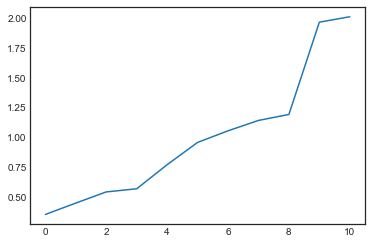

In [202]:
plt.plot(eig_val_cov)
plt.show()

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


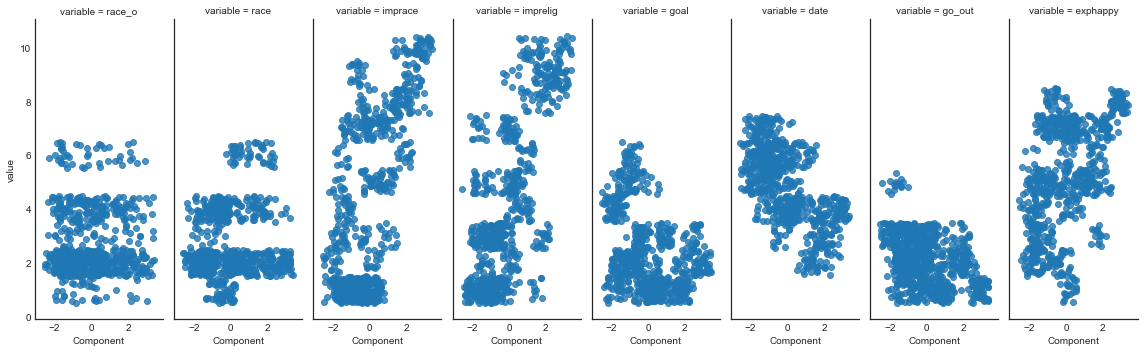

In [206]:
# Normalize the data so that all variables have a mean of 0 and standard deviation
# of 1.
X = StandardScaler().fit_transform(df_pca)

# Create P, which we will use to transform Cx into Cy to get Y, the
# dimensionally-reduced representation of X.
P = eig_vec_cov[:, 0]

# Transform X into Y.
Y = P.T.dot(Xt)

# Combine X and Y for plotting purposes.
data_to_plot = df_pca[['race_o', 'race','imprace','imprelig','goal','date','go_out','exphappy' ]]

data_to_plot['Component'] = Y
data_to_plot = pd.melt(data_to_plot, id_vars='Component')

g = sns.FacetGrid(data_to_plot, col="variable", size=5, aspect=0.4)
g = g.map(
    sns.regplot,
    "Component",
    "value",
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
plt.show()

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.1825406  0.17840074 0.10825426 0.10369987 0.09581654 0.08699275
 0.07007885 0.05174199 0.04935561 0.0408797  0.03223909]


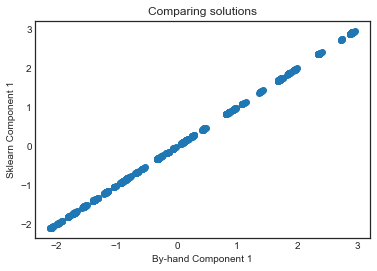

In [205]:
sklearn_pca = PCA(n_components=11)
Y_sklearn = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

# Compare the sklearn solution to ours – a perfect match.
plt.plot(Y_sklearn[:, 0], Y, 'o')
plt.title('Comparing solutions')
plt.ylabel('Sklearn Component 1')
plt.xlabel('By-hand Component 1')
plt.show()